# Principal Component Analysis

## Searching for the spread

### RMDS Workshop

# Principal Component Analysis
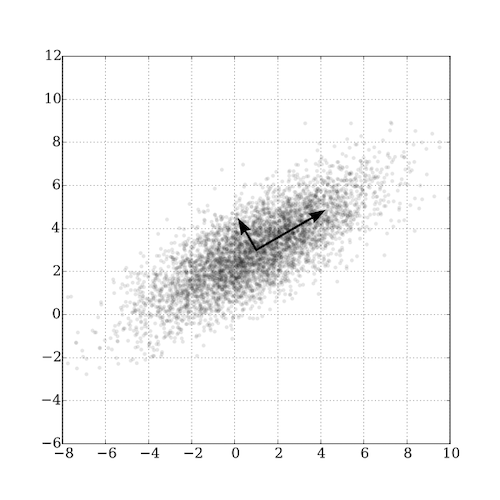


# Principal Component Analysis

- Unsupervised Machine Learning Method
- Used for Dimensionality Reduction and Feature Extraction
- Builds a Representative Model via Matrix Factorization

## Dimensionality Reduction

**Curse of Dimensionality** - as the number of dimensions in your data grows, exponentially more data is needed to produce a representative sample of that data set. 

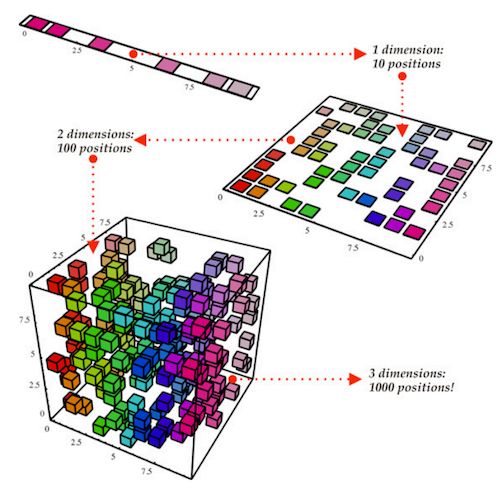

## Dimensionality Reduction

- Projects high dimensional data into lower dimensions 

- PCA performs dimensionality reduction in two possible ways

    - Reduces the number of data points in the data set
    - Reduces the number of variables in the data points
    
Let $X = [x_1, x_2, ..., x_n] \in \mathbb{R}^{m\times n}$ where each $x_j$ is a data point with $m$ variables and we have $n$ data points, PCA will either reduce $n$ or $m$. 

Today we will focus on applying PCA to the number of data points. 
    

## PCA Model 

In mathematical language, for a dataset $X = [x_1, x_2, ..., x_n] \in \mathbb{R}^{m\times n}$ PCA solves

$\displaystyle \min_{Z,A} \|X - ZA\|$

where $Z \in \mathbb{R}^{m\times p}$ and $A \in \mathbb{R}^{p \times n}$, which is the same as considering modeling the dataset as individual points:

$\displaystyle \min_{z,\alpha} \sum_{j = 1}^n \|x_j - \sum_{k = 1}^p \alpha_{j,k} z_k \|$

where $Z = [z_1, z_2 ... , z_p]$. 

The prinicpal components are the collection $\{z_1, z_2, ..., z_k\}$. We choose $p$ to be significantly smaller than $n$, allowing the dataset to be represented by a small number of principal components instead of a large number of data points

## PCA Model

Principal Component Properties

- Proven to be eigenvectors of $X^TX$
- As eigenvectors, they are orthogonal to each other
- If the data has zero mean, principal components point in directions of largest data variance
- Generally ordered in terms of data variance, the first principal component points in the direction of largest spread, the second in direction of second largest spread, etc


## PCA Model

How do we interpret this picture based on what we now know about PCA? 

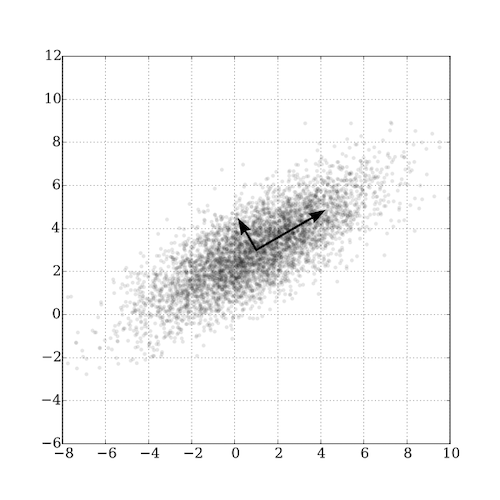

## PCA in the World

Applications of PCA
- Pre-processing dimensionality reduction for neuron detection in neuronal calcium videos
- Finding variables that correspond to largest variance in fisheries studies
- Finance allocation on principal portfolios to reduce risk
- Biomedical applications to find symptoms corresponding to disease diagnosis
- Feature extraction from image databases - facial recognition, image compression for RGB images


## Apply PCA to MNIST data for feature extraction

PCA is often used as a preprocessing step to extract features for other machine learning models. 

- Load the data
- Split into training and testing sets

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

train_img, test_img, train_lbl, test_lbl = train_test_split(
    X,y, test_size=1/5.0, random_state=0)

## Apply PCA to MNIST data for feature extraction

Now that we have training and testing data, let's see what this data looks like

- Visualize first 10 test images with labels

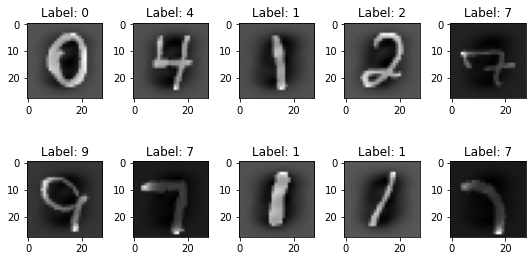

In [6]:
import matplotlib.pyplot as plt

num = 10
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_img[i].reshape(28,28), cmap='gray')
    ax.set_title('Label: {}'.format(test_lbl[i]))
plt.tight_layout()
plt.show()


## Apply PCA to MNIST data for feature extraction

PCA scales based on the data itself, generally it's good practice to standardize the data to mean = 0 and variance = 1

- Standardize data to mean = 0, variance = 1 via StandardScaler

In [3]:
## Standardize the data to mean = 0, variance = 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

## Apply PCA to MNIST data for feature extraction

The data is prepped, we can built the PCA model

- Build PCA model to account for 75% of the variance
- Print explained variance and the number of principal components used

In [17]:
## build and fit pca model to fit % of variance

pca = PCA(n_components = 500)
pca.fit(train_img)

# print the variance
print(np.sum(pca.explained_variance_ratio_))

# print how many principal components are found
components = pca.components_
print(components.shape)

0.9857808134822305
(500, 784)


## Apply PCA to MNIST data for feature extraction

Let's take a peek at the principal components

- Visualize the top 15 components

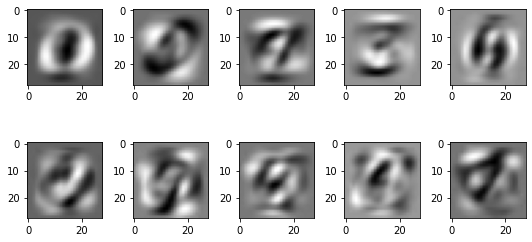

In [11]:
## Visualize the top 15 components

num = 10
num_row = int(num/5)
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(components[i].reshape(28,28), cmap='gray')
plt.tight_layout()
plt.show()

## Apply PCA to MNIST data for feature extraction

Let's apply the PCA model to test data and take a look at the extracted features

- Apply PCA model to test images
- Display first ten test images

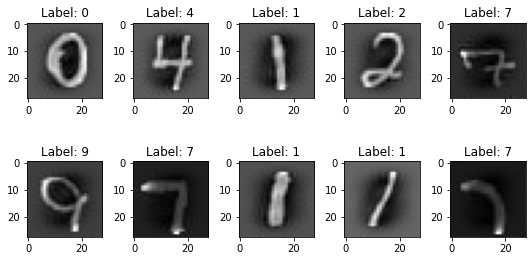

In [12]:
## Visualize how PCA models the first ten test images

test_transformed = pca.transform(test_img)
test_modeled = pca.inverse_transform(test_transformed)

num = 10
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_modeled[i].reshape(28,28), cmap='gray')
    ax.set_title('Label: {}'.format(test_lbl[i]))
plt.tight_layout()
plt.show()

## Apply PCA to MNIST data for feature extraction

Our features are extracted, we are ready to apply our classifier model, in this case logistic regression. 

- Build logistic regression model using the training data transformed after PCA
- Print out the accuracy of the logistic model applied to transformed test data

In [13]:
## apply logistic regression to MNIST classification problem after PCA

from sklearn.linear_model import LogisticRegression

train_transformed = pca.transform(train_img)

logisticRegr = LogisticRegression(solver = 'lbfgs')
logisticRegr.fit(train_transformed, train_lbl)

print(logisticRegr.score(test_transformed,test_lbl))

0.9162142857142858


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## PCA on MNIST

- only using 75% of variance, able to have 91% accuracy for logistic regression. 

If we try including more variance in our PCA model, the logistic regression accuracy increases. 